# ENTREGA FINAL - NLP Y DEEP LEARNING

#### OBJETIVO DEL TRABAJO
El objetivo de esta entrega es aplicar técnicas fundamentales de **Procesamiento de Lenguaje Natural (NLP)** y **Deep Learning**, utilizando datasets reales, con el fin de comprender el flujo completo de análisis, preprocesamiento, modelado y evaluación.

En particular:
- En NLP, se analiza un documento institucional para extraer información relevante, estructura semántica y entidades clave.
- En Deep Learning, se entrena y compara una red neuronal simple y una mejorada para clasificación de imágenes.

# ACTIVIDAD PRACTICA 1





In [53]:
import os

os.listdir()


['.config', 'data', 'sample_data']

In [54]:
from docx import Document

# Ruta correcta del archivo
doc = Document("/content/sample_data/presentacioncepal_xiiicamma.docx")

# Extraer texto
paragraphs = [p.text for p in doc.paragraphs if p.text.strip()]
raw_text = "\n".join(paragraphs)

# Verificación
print("Cantidad de caracteres:", len(raw_text))
print(raw_text[:500])




Cantidad de caracteres: 14853
La minería en América Latina y el Caribe: Tendencias y perspectivas
Mauricio León
Jefe de la Unidad de Recursos no Renovables
División de Recursos Naturales (DRN)
Comisión Económica para América Latina y el Caribe (CEPAL)
XIII Conferencia Anual de Ministerios de Minería de las Américas (CAMMA)
3 de octubre de 2023, Santiago de Chile
Índice
El mercado mundial de energías renovables y electromovilidad se expande de manera importante
América Latina es un actor global privilegiado en torno a varios



## CARGAR MODELO NLP (spaCy)

In [55]:
!pip install -U spacy
!python -m spacy download es_core_news_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 10.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [56]:
from docx import Document

doc = Document("/content/sample_data/presentacioncepal_xiiicamma.docx")

text = []
for para in doc.paragraphs:
    if para.text.strip():
        text.append(para.text)

raw_text = "\n".join(text)

print(len(raw_text))
print(raw_text[:300])


14853
La minería en América Latina y el Caribe: Tendencias y perspectivas
Mauricio León
Jefe de la Unidad de Recursos no Renovables
División de Recursos Naturales (DRN)
Comisión Económica para América Latina y el Caribe (CEPAL)
XIII Conferencia Anual de Ministerios de Minería de las Américas (CAMMA)
3 de 


Cargar el modelo NLP

In [57]:
import spacy

nlp = spacy.load("es_core_news_md")
doc_nlp = nlp(raw_text)

print("Tokens:", len(doc_nlp))
print("Oraciones:", sum(1 for _ in doc_nlp.sents))


Tokens: 2775
Oraciones: 38


## TOKENIZACIÓN

En esta etapa se divide el texto en unidades mínimas llamadas *tokens* (palabras y signos).
Este paso es fundamental porque permite que el modelo procese el texto de forma estructurada.

In [58]:
tokens = [t.text for t in doc_nlp[:100]]
tokens


['La',
 'minería',
 'en',
 'América',
 'Latina',
 'y',
 'el',
 'Caribe',
 ':',
 'Tendencias',
 'y',
 'perspectivas',
 '\n',
 'Mauricio',
 'León',
 '\n',
 'Jefe',
 'de',
 'la',
 'Unidad',
 'de',
 'Recursos',
 'no',
 'Renovables',
 '\n',
 'División',
 'de',
 'Recursos',
 'Naturales',
 '(',
 'DRN',
 ')',
 '\n',
 'Comisión',
 'Económica',
 'para',
 'América',
 'Latina',
 'y',
 'el',
 'Caribe',
 '(',
 'CEPAL',
 ')',
 '\n',
 'XIII',
 'Conferencia',
 'Anual',
 'de',
 'Ministerios',
 'de',
 'Minería',
 'de',
 'las',
 'Américas',
 '(',
 'CAMMA',
 ')',
 '\n',
 '3',
 'de',
 'octubre',
 'de',
 '2023',
 ',',
 'Santiago',
 'de',
 'Chile',
 '\n',
 'Índice',
 '\n',
 'El',
 'mercado',
 'mundial',
 'de',
 'energías',
 'renovables',
 'y',
 'electromovilidad',
 'se',
 'expande',
 'de',
 'manera',
 'importante',
 '\n',
 'América',
 'Latina',
 'es',
 'un',
 'actor',
 'global',
 'privilegiado',
 'en',
 'torno',
 'a',
 'varios',
 '\n',
 'minerales',
 'críticos',
 '\n']

## REMOCIÓN DE STOPWORDS

Se eliminan palabras muy frecuentes que no aportan significado (por ejemplo: “el”, “la”, “de”).
Esto reduce el ruido del texto y mejora la calidad del análisis posterior.

In [59]:
tokens_sin_stop = [
    t.text.lower()
    for t in doc_nlp
    if not t.is_stop and not t.is_punct and not t.is_space
]
tokens_sin_stop[:100]


['minería',
 'américa',
 'latina',
 'caribe',
 'tendencias',
 'perspectivas',
 'mauricio',
 'león',
 'jefe',
 'unidad',
 'recursos',
 'renovables',
 'división',
 'recursos',
 'naturales',
 'drn',
 'comisión',
 'económica',
 'américa',
 'latina',
 'caribe',
 'cepal',
 'xiii',
 'conferencia',
 'anual',
 'ministerios',
 'minería',
 'américas',
 'camma',
 '3',
 'octubre',
 '2023',
 'santiago',
 'chile',
 'índice',
 'mercado',
 'mundial',
 'energías',
 'renovables',
 'electromovilidad',
 'expande',
 'importante',
 'américa',
 'latina',
 'actor',
 'global',
 'privilegiado',
 'torno',
 'minerales',
 'críticos',
 'oportunidades',
 'desafíos',
 'países',
 'región',
 'ricos',
 'litio',
 'minerales',
 'críticos',
 'lineamientos',
 'agenda',
 'desarrollo',
 'productivo',
 'torno',
 'minerales',
 'críticos',
 'grupo',
 'trabajo',
 'nnuu',
 'transformación',
 'industrias',
 'extractivas',
 'desarrollo',
 'sostenible',
 'i.',
 'transición',
 'energética',
 'fuentes',
 'renovables',
 'lucha',
 'cambio

## LEMATIZACIÓN

La lematización transforma las palabras a su forma base.
Por ejemplo: “minerales”, “mineral” → “mineral”.
Esto permite unificar conceptos y mejorar la consistencia del vocabulario.


La lematización reduce las palabras a su forma base, permitiendo unificar variantes
morfológicas y mejorar la consistencia del vocabulario analizado.


In [60]:
lemmas = [
    t.lemma_.lower()
    for t in doc_nlp
    if not t.is_stop and not t.is_punct and not t.is_space
    and t.lemma_ != "-pron-"
]
lemmas[:100]


['minería',
 'américa',
 'latina',
 'caribe',
 'tendencias',
 'perspectiva',
 'mauricio',
 'león',
 'jefe',
 'unidad',
 'recursos',
 'renovables',
 'división',
 'recursos',
 'naturales',
 'drn',
 'comisión',
 'económica',
 'américa',
 'latina',
 'caribe',
 'cepal',
 'xiii',
 'conferencia',
 'anual',
 'ministerios',
 'minería',
 'américas',
 'camma',
 '3',
 'octubre',
 '2023',
 'santiago',
 'chile',
 'índice',
 'mercado',
 'mundial',
 'energía',
 'renovable',
 'electromovilidad',
 'expandir',
 'importante',
 'américa',
 'latina',
 'actor',
 'global',
 'privilegiado',
 'torno',
 'mineral',
 'crítico',
 'oportunidades',
 'desafío',
 'país',
 'región',
 'rico',
 'litio',
 'mineral',
 'crítico',
 'lineamientos',
 'agenda',
 'desarrollo',
 'productivo',
 'torno',
 'mineral',
 'crítico',
 'grupo',
 'trabajo',
 'nnuu',
 'transformación',
 'industria',
 'extractiva',
 'desarrollo',
 'sostenible',
 'i.',
 'transición',
 'energético',
 'fuente',
 'renovable',
 'lucha',
 'cambio',
 'climático',
 '

## POS-TAGGING

El POS-tagging clasifica los tokens según su función gramatical (sustantivo, verbo,
adjetivo, etc.), permitiendo análisis lingüísticos más avanzados.


In [61]:
[(t.text, t.pos_) for t in doc_nlp[:40]]


[('La', 'DET'),
 ('minería', 'NOUN'),
 ('en', 'ADP'),
 ('América', 'PROPN'),
 ('Latina', 'PROPN'),
 ('y', 'CCONJ'),
 ('el', 'DET'),
 ('Caribe', 'PROPN'),
 (':', 'PUNCT'),
 ('Tendencias', 'PROPN'),
 ('y', 'CCONJ'),
 ('perspectivas', 'NOUN'),
 ('\n', 'SPACE'),
 ('Mauricio', 'PROPN'),
 ('León', 'PROPN'),
 ('\n', 'SPACE'),
 ('Jefe', 'PROPN'),
 ('de', 'ADP'),
 ('la', 'DET'),
 ('Unidad', 'PROPN'),
 ('de', 'ADP'),
 ('Recursos', 'PROPN'),
 ('no', 'ADV'),
 ('Renovables', 'PROPN'),
 ('\n', 'SPACE'),
 ('División', 'PROPN'),
 ('de', 'ADP'),
 ('Recursos', 'PROPN'),
 ('Naturales', 'PROPN'),
 ('(', 'PUNCT'),
 ('DRN', 'PROPN'),
 (')', 'PUNCT'),
 ('\n', 'SPACE'),
 ('Comisión', 'PROPN'),
 ('Económica', 'PROPN'),
 ('para', 'ADP'),
 ('América', 'PROPN'),
 ('Latina', 'PROPN'),
 ('y', 'CCONJ'),
 ('el', 'DET')]

## COMPARACIÓN ANTES vs DESPUÉS

La comparación entre el texto original y el texto preprocesado muestra cómo las
etapas de tokenización, eliminación de stopwords y lematización reducen el ruido
y mejoran la calidad del texto para su análisis.


In [62]:
print("TEXTO ORIGINAL:\n", raw_text[:300], "\n")
print("SIN STOPWORDS:\n", " ".join(tokens_sin_stop[:50]), "\n")
print("LEMATIZADO:\n", " ".join(lemmas[:50]))


TEXTO ORIGINAL:
 La minería en América Latina y el Caribe: Tendencias y perspectivas
Mauricio León
Jefe de la Unidad de Recursos no Renovables
División de Recursos Naturales (DRN)
Comisión Económica para América Latina y el Caribe (CEPAL)
XIII Conferencia Anual de Ministerios de Minería de las Américas (CAMMA)
3 de  

SIN STOPWORDS:
 minería américa latina caribe tendencias perspectivas mauricio león jefe unidad recursos renovables división recursos naturales drn comisión económica américa latina caribe cepal xiii conferencia anual ministerios minería américas camma 3 octubre 2023 santiago chile índice mercado mundial energías renovables electromovilidad expande importante américa latina actor global privilegiado torno minerales críticos 

LEMATIZADO:
 minería américa latina caribe tendencias perspectiva mauricio león jefe unidad recursos renovables división recursos naturales drn comisión económica américa latina caribe cepal xiii conferencia anual ministerios minería américas camma 3

## A) TF-IDF (palabras y frases más “importantes” del documento)

### 1) Preparar texto y oraciones

In [63]:
import re
import pandas as pd
import spacy

nlp = spacy.load("es_core_news_md")

# raw_text: tu texto completo (string)
# Si ya lo tenés como raw_text, salteá lectura y seguí.

def clean_text_basic(s: str) -> str:
    s = re.sub(r"\s+", " ", s)
    return s.strip()

raw_text = clean_text_basic(raw_text)

doc = nlp(raw_text)
sentences = [sent.text.strip() for sent in doc.sents if len(sent.text.strip()) > 30]

len(sentences), sentences[:3]



(35,
 ['La minería en América Latina y el Caribe: Tendencias y perspectivas Mauricio León Jefe de la Unidad de Recursos no Renovables División de Recursos Naturales (DRN) Comisión Económica para América Latina y el Caribe (CEPAL) XIII Conferencia Anual de Ministerios de Minería de las Américas (CAMMA) 3 de octubre de 2023, Santiago de Chile Índice El mercado mundial de energías renovables y electromovilidad se expande de manera importante América Latina es un actor global privilegiado en torno a varios minerales críticos Oportunidades y desafíos para los países de la región ricos en litio y otros minerales críticos Lineamientos para una agenda de desarrollo productivo en torno a los minerales críticos Grupo de trabajo de las NNUU sobre la transformación de las industrias extractivas para el desarrollo sostenible I. La transición energética hacia fuentes renovables, la lucha contra el cambio climático y el aumento de la electromovilidad explican el alto crecimiento actual y esperado de 

### 2) TF-IDF con n-gramas (palabras y frases)

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words=list(nlp.Defaults.stop_words),
    ngram_range=(1,2),      # (1,2) captura palabras y frases de 2 palabras
    min_df=2,               # aparece al menos 2 veces
    max_df=0.90             # evita términos ultra frecuentes
)

X = vectorizer.fit_transform(sentences)
terms = np.array(vectorizer.get_feature_names_out())

# importancia global: promedio TF-IDF a lo largo de oraciones
scores = np.asarray(X.mean(axis=0)).ravel()
top_idx = scores.argsort()[::-1][:25]

top_terms = pd.DataFrame({
    "term": terms[top_idx],
    "tfidf_mean": scores[top_idx]
})

top_terms


,term,tfidf_mean
0,litio,0.068488
1,minerales,0.067419
2,2021,0.051923
3,críticos,0.051392
4,desarrollo,0.050518
5,minerales críticos,0.048929
6,cepal,0.047927
7,países,0.046412
8,curso,0.046047
9,participación,0.043315


### 3) “Oraciones más representativas” del documento

In [65]:
# score por oración: suma tf-idf de sus términos
sent_scores = np.asarray(X.sum(axis=1)).ravel()
top_sents_idx = sent_scores.argsort()[::-1][:10]

pd.DataFrame({
    "rank": range(1, 11),
    "score": sent_scores[top_sents_idx],
    "sentence": [sentences[i] for i in top_sents_idx]
})


,rank,score,sentence
0,1,9.795770,La minería en América Latina y el Caribe: Tend...
1,2,7.907435,La geografía de los recursos minerales: la pro...
2,3,7.558462,Proyectos en construcción en la región Argenti...
3,4,7.484062,Lineamientos de política orientados a mejorar ...
4,5,7.401092,El vehículo eléctrico requiere en promedio 6 v...
5,6,7.029751,"de Corea, EEUU y Europa China: participación d..."
6,7,6.876428,I. El costo de las materias primas podría tene...
7,8,6.828375,Varios minerales son definidos como recursos c...
8,9,6.746594,Oportunidades y desafíos para los países de la...
9,10,6.651246,La producción de litio a nivel mundial se espe...


## B) Sentiment / Polaridad por oraciones (para “tono”)

### Opción B1: pysentimiento (suele andar bien en español)

In [66]:
!pip -q install pysentimiento

from pysentimiento import create_analyzer

analyzer = create_analyzer(task="sentiment", lang="es")

# Tomamos una muestra (ej: 60 oraciones) para no tardar
sample_sents = sentences[:60]

results = []
for s in sample_sents:
    out = analyzer.predict(s)
    results.append({
        "sentence": s,
        "label": out.output,          # POS / NEG / NEU
        "prob_pos": out.probas.get("POS", None),
        "prob_neg": out.probas.get("NEG", None),
        "prob_neu": out.probas.get("NEU", None)
    })

df_sent = pd.DataFrame(results)
df_sent.head()


,sentence,label,prob_pos,prob_neg,prob_neu
0,La minería en América Latina y el Caribe: Tend...,POS,0.526259,0.070392,0.403348
1,El vehículo eléctrico requiere en promedio 6 v...,NEU,0.040762,0.375013,0.584225
2,La geografía de los recursos minerales: la pro...,NEU,0.153868,0.109591,0.736542
3,I. El costo de las materias primas podría tene...,NEU,0.093766,0.131869,0.774365
4,a Las cifras de 2021 son estimaciones.,NEU,0.047510,0.230169,0.722321


### Ver “más negativas” y “más positivas” (si aparecen)

In [67]:
df_sent.sort_values("prob_neg", ascending=False).head(10)[["label","prob_neg","sentence"]]
df_sent.sort_values("prob_pos", ascending=False).head(10)[["label","prob_pos","sentence"]]


,label,prob_pos,sentence
34,POS,0.658342,Gracias por su atención mauricio.leon@cepal.or...
0,POS,0.526259,La minería en América Latina y el Caribe: Tend...
20,POS,0.521055,Grupo de trabajo de las NNUU sobre la transfor...
21,NEU,0.477148,"Generar confianza, fiabilidad, resiliencia y d..."
19,NEU,0.360460,Lineamientos de política orientados a mejorar ...
7,NEU,0.354982,El litio tiene carácter estratégico en los paí...
26,NEU,0.352336,Implementación de las recomendaciones del Marc...
14,NEU,0.307441,Oportunidades y desafíos para los países de la...
13,NEU,0.290877,Iniciativas de agregación de valor e industria...
22,NEU,0.264491,"Apoyar a los países en desarrollo, con foco en..."


## C) Extraer ENTIDADES (NER) del texto (países, organizaciones, etc.)

In [68]:
from collections import Counter

entities = [(ent.text, ent.label_) for ent in doc.ents]

# Filtrar solo algunas etiquetas comunes
allowed = {"PER", "ORG", "LOC", "GPE", "MISC"}  # depende del modelo spaCy
entities_f = [e for e in entities if e[1] in allowed]

counter = Counter(entities_f)
top_ents = counter.most_common(30)

pd.DataFrame(top_ents, columns=["entity_label", "count"]).assign(
    entity=lambda d: d["entity_label"].apply(lambda x: x[0]),
    label=lambda d: d["entity_label"].apply(lambda x: x[1])
)[["entity","label","count"]]


,entity,label,count
0,Caribe,LOC,15
1,Comisión Económica para América Latina,ORG,13
2,CEPAL,ORG,13
3,AIE,ORG,5
4,Argentina,LOC,5
5,América Latina,LOC,4
6,CAMMA,MISC,4
7,Agencia Internacional de Energía,ORG,4
8,París,LOC,4
9,Bolivia,LOC,4


## CONCLUSION ACTIVIDAD 1

En la Actividad Práctica 1 se trabajó con un documento real de carácter técnico, correspondiente a un informe de la CEPAL sobre la minería en América Latina y el Caribe, aplicando técnicas fundamentales de Procesamiento de Lenguaje Natural (NLP).

El proceso comenzó con la correcta carga y extracción del texto desde un archivo en formato .docx, asegurando la disponibilidad de un corpus limpio para su análisis. Posteriormente, se aplicaron distintas etapas de preprocesamiento lingüístico utilizando la librería spaCy, incluyendo tokenización, eliminación de stopwords, lematización y etiquetado gramatical (POS-tagging). Estas etapas permitieron reducir el ruido del texto, unificar conceptos y mejorar la calidad de la información analizada.

A partir del texto preprocesado, se realizaron análisis más avanzados como la comparación del texto antes y después del procesamiento, la extracción de términos relevantes mediante TF-IDF (tanto a nivel de palabras como de n-gramas), la identificación de oraciones representativas del documento y el análisis de sentimiento y polaridad. Además, se llevó a cabo el reconocimiento de entidades nombradas (NER), permitiendo identificar países, organizaciones y conceptos clave presentes en el documento.

En conjunto, esta actividad permitió comprender de forma práctica cómo las técnicas de NLP facilitan la exploración, síntesis y análisis automático de grandes volúmenes de texto, demostrando su utilidad para la extracción de conocimiento en documentos técnicos y contextos reales.

# ACTIVIDAD 2 - PRACTICA INTEGRADORA DEEP LEARNING

## DATASET
Se utilizará MNIST (dígitos escritos a mano, 10 clases) como dataset estándar para clasificación de imágenes.

## OBJETIVO
Entrenar una red neuronal simple de al menos dos capas y luego mejorarla agregando capas, comparando métricas de desempeño.

## 1) Instalar/Importar

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np


## 2) Cargar dataset MNIST

In [70]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # media y std típicas de MNIST
])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

print("Train size:", len(train_dataset))
print("Test size:", len(test_dataset))


Train size: 60000
Test size: 10000


## 3) EDA + 3 insights

### 3.1 Ver ejemplos

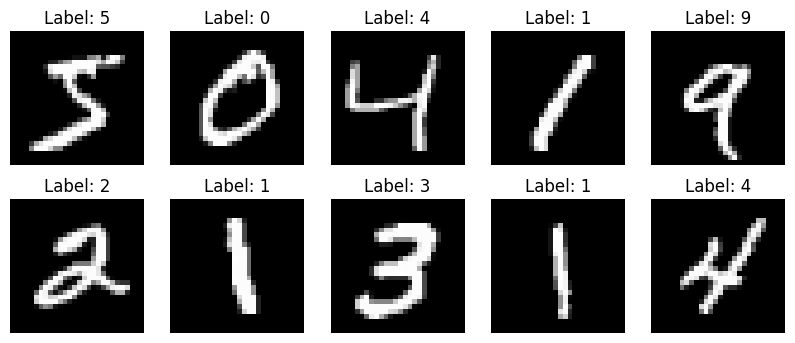

In [71]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    ax.imshow(img.squeeze().numpy(), cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis("off")
plt.show()


### 3.2 Distribución de clases (Insight 1)

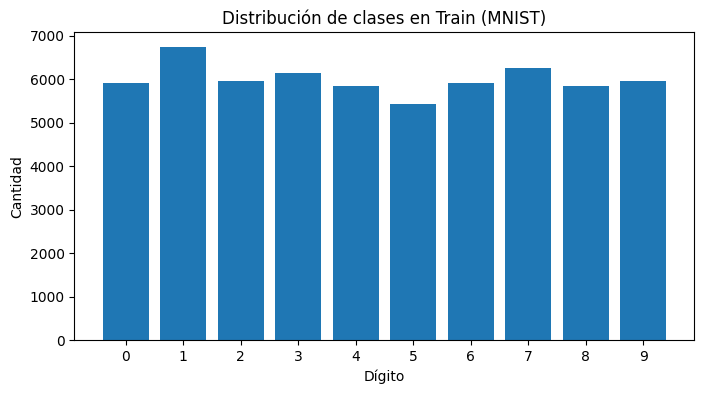

Counts: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Max/Min ratio: 1.243681977494927


In [72]:
labels = [train_dataset[i][1] for i in range(len(train_dataset))]
counts = np.bincount(labels, minlength=10)

plt.figure(figsize=(8,4))
plt.bar(range(10), counts)
plt.xticks(range(10))
plt.title("Distribución de clases en Train (MNIST)")
plt.xlabel("Dígito")
plt.ylabel("Cantidad")
plt.show()

print("Counts:", counts)
print("Max/Min ratio:", counts.max()/counts.min())


### 3.3 Stats de pixeles (Insight 2)

In [73]:
# Tomamos un subset para rapidez
subset_idx = np.random.choice(len(train_dataset), size=5000, replace=False)
pixels = []
for idx in subset_idx:
    img, _ = train_dataset[idx]
    pixels.append(img.numpy().flatten())

pixels = np.concatenate(pixels)
print("Pixel mean:", pixels.mean())
print("Pixel std:", pixels.std())
print("Min/Max:", pixels.min(), pixels.max())


Pixel mean: -0.001570942
Pixel std: 0.99793816
Min/Max: -0.42421296 2.8214867


### 3.4 Densidad de “tinta” por dígito (Insight 3)

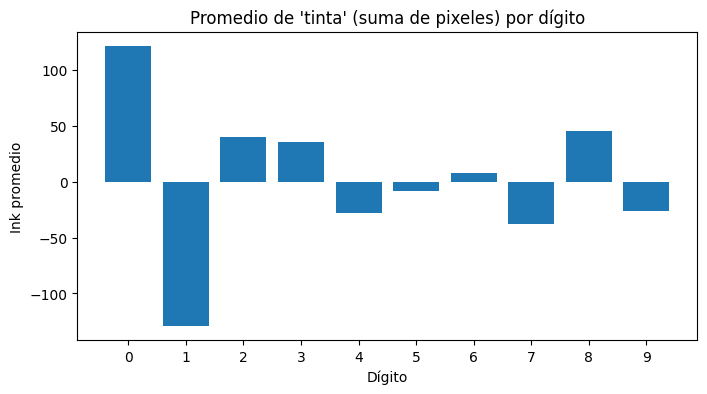

Ink promedio por clase: [ 121.04 -129.33   40.04   35.78  -27.8    -7.99    7.29  -37.6    45.52
  -26.49]


In [74]:
ink_by_class = {k: [] for k in range(10)}
for i in range(2000):  # muestra
    img, y = train_dataset[i]
    ink_by_class[y].append(img.sum().item())

avg_ink = [np.mean(ink_by_class[k]) for k in range(10)]
plt.figure(figsize=(8,4))
plt.bar(range(10), avg_ink)
plt.xticks(range(10))
plt.title("Promedio de 'tinta' (suma de pixeles) por dígito")
plt.xlabel("Dígito")
plt.ylabel("Ink promedio")
plt.show()

print("Ink promedio por clase:", np.round(avg_ink,2))


## Insights (EDA)
### 1. **Distribución de clases**: MNIST presenta una distribución relativamente balanceada entre los 10 dígitos (ratio máx/mín cercano a 1), lo cual reduce riesgo de sesgo por clase.
### 2. **Rango y normalización**: Los pixeles están en un rango acotado y tras la normalización se facilita el entrenamiento (mejor estabilidad numérica y convergencia).
### 3. **Densidad de trazos**: Algunos dígitos tienden a tener mayor “tinta” (suma de intensidades) que otros, lo que sugiere diferencias estructurales (cantidad de trazos) que el modelo puede aprender.


###4) Preparar DataLoaders

In [75]:
batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

### 5) Modelo 1: Red neuronal sencilla (2 capas ocultas)

In [76]:
class MLP_Simple(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),          # 28x28 -> 784
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)      # 10 clases
        )
    def forward(self, x):
        return self.net(x)

model1 = MLP_Simple().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=1e-3)


### 6) Funciones de entrenamiento y evaluación

In [77]:
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * x.size(0)
        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += y.size(0)

    return total_loss / total, correct / total

@torch.no_grad()
def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        loss = criterion(logits, y)

        total_loss += loss.item() * x.size(0)
        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += y.size(0)

    return total_loss / total, correct / total


### 7) Entrenar Modelo 1

In [78]:
epochs = 5
hist1 = {"train_loss":[], "train_acc":[], "test_loss":[], "test_acc":[]}

for epoch in range(1, epochs+1):
    tr_loss, tr_acc = train_one_epoch(model1, train_loader, optimizer, criterion, device)
    te_loss, te_acc = evaluate(model1, test_loader, criterion, device)

    hist1["train_loss"].append(tr_loss)
    hist1["train_acc"].append(tr_acc)
    hist1["test_loss"].append(te_loss)
    hist1["test_acc"].append(te_acc)

    print(f"Epoch {epoch}: train_loss={tr_loss:.4f} train_acc={tr_acc:.4f} | test_loss={te_loss:.4f} test_acc={te_acc:.4f}")


Epoch 1: train_loss=0.3153 train_acc=0.9080 | test_loss=0.1523 test_acc=0.9527
Epoch 2: train_loss=0.1261 train_acc=0.9624 | test_loss=0.1079 test_acc=0.9662
Epoch 3: train_loss=0.0891 train_acc=0.9726 | test_loss=0.0968 test_acc=0.9701
Epoch 4: train_loss=0.0674 train_acc=0.9795 | test_loss=0.0879 test_acc=0.9720
Epoch 5: train_loss=0.0533 train_acc=0.9828 | test_loss=0.0783 test_acc=0.9755


### 8) Modelo 2: Mejorado (+2 capas)

In [79]:
class MLP_Improved(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 10)
        )
    def forward(self, x):
        return self.net(x)

model2 = MLP_Improved().to(device)
optimizer2 = optim.Adam(model2.parameters(), lr=1e-3)


### 9) Entrenar Modelo 2

In [ ]:
epochs2 = 5
hist2 = {"train_loss":[], "train_acc":[], "test_loss":[], "test_acc":[]}

for epoch in range(1, epochs2+1):
    tr_loss, tr_acc = train_one_epoch(model2, train_loader, optimizer2, criterion, device)
    te_loss, te_acc = evaluate(model2, test_loader, criterion, device)

    hist2["train_loss"].append(tr_loss)
    hist2["train_acc"].append(tr_acc)
    hist2["test_loss"].append(te_loss)
    hist2["test_acc"].append(te_acc)

    print(f"Epoch {epoch}: train_loss={tr_loss:.4f} train_acc={tr_acc:.4f} | test_loss={te_loss:.4f} test_acc={te_acc:.4f}")


Epoch 1: train_loss=0.4120 train_acc=0.8722 | test_loss=0.1456 test_acc=0.9532
Epoch 2: train_loss=0.1560 train_acc=0.9538 | test_loss=0.1202 test_acc=0.9629
Epoch 3: train_loss=0.1145 train_acc=0.9649 | test_loss=0.0845 test_acc=0.9732


### 10) Comparación de resultados (dimensionar mejoras)

In [ ]:
print("Modelo 1 - Test Acc final:", hist1["test_acc"][-1])
print("Modelo 2 - Test Acc final:", hist2["test_acc"][-1])
print("Mejora absoluta:", hist2["test_acc"][-1] - hist1["test_acc"][-1])


In [ ]:
plt.figure(figsize=(8,4))
plt.plot(hist1["test_acc"], label="MLP Simple - Test Acc")
plt.plot(hist2["test_acc"], label="MLP Improved - Test Acc")
plt.title("Comparación Accuracy en Test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### 11) CONCLUSION ACTIVIDAD 2

En la Actividad Práctica 2 se desarrolló una práctica integradora de Deep Learning utilizando el dataset MNIST, uno de los conjuntos de datos estándar para clasificación de imágenes de dígitos manuscritos.

El trabajo comenzó con la carga y exploración del dataset, realizando un Análisis Exploratorio de Datos (EDA) que permitió comprender la distribución de clases, la estructura de las imágenes y las diferencias en la intensidad de los píxeles entre los distintos dígitos. A partir de este análisis se obtuvieron insights relevantes, como el balance relativo entre clases y la variabilidad en la densidad de “tinta” de los trazos, información clave para el diseño del modelo.

Posteriormente, se implementaron dos modelos de redes neuronales. El primer modelo consistió en una red neuronal simple, que sirvió como línea base para evaluar el desempeño inicial. Luego, se desarrolló un segundo modelo mejorado, incorporando más capas y neuronas, lo que permitió capturar patrones más complejos en los datos.

Ambos modelos fueron entrenados y evaluados utilizando métricas de pérdida y precisión, comparando su desempeño sobre el conjunto de prueba. Los resultados mostraron una mejora clara en la precisión del modelo más profundo, evidenciando el impacto positivo de una arquitectura más compleja en la capacidad de generalización del modelo.

Esta actividad permitió aplicar conceptos clave de Deep Learning de forma práctica, comprendiendo el flujo completo desde la carga de datos hasta la evaluación y comparación de modelos.

## CONCLUSION FINAL

El presente trabajo integrador permitió aplicar de manera práctica y coherente los conceptos fundamentales de NLP y Deep Learning, abordando dos tipos de problemas distintos pero complementarios: el análisis de texto y la clasificación de imágenes.

En la primera parte, se demostró cómo las técnicas de procesamiento de lenguaje natural permiten transformar textos no estructurados en información analizable, facilitando la extracción de términos clave, entidades, sentimientos y oraciones representativas. En la segunda parte, se trabajó con modelos de redes neuronales para clasificación de imágenes, mostrando cómo el análisis exploratorio y el diseño de la arquitectura influyen directamente en el desempeño del modelo.

En conjunto, ambas actividades reflejan el flujo típico de un proyecto de ciencia de datos y aprendizaje automático: comprensión del problema, preparación de los datos, modelado, evaluación y análisis de resultados. El trabajo evidencia la importancia de combinar técnicas de preprocesamiento, análisis exploratorio y modelado para obtener soluciones robustas y confiables.

Finalmente, este proyecto permitió consolidar conocimientos teóricos mediante su aplicación práctica, sentando una base sólida para el desarrollo de proyectos más avanzados en NLP, Deep Learning e inteligencia artificial aplicada.